# Step1: preprocess data

In [19]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime, time
import pytz


# --------------------- preprocessing ----------------------- #
# define paths
files = ['tweet_data/tweets_#gohawks.txt', 'tweet_data/tweets_#gopatriots.txt', 'tweet_data/tweets_#nfl.txt', 'tweet_data/tweets_#patriots.txt', 'tweet_data/tweets_#sb49.txt', 'tweet_data/tweets_#superbowl.txt']

# calculate statistics of each hashtag
def cal_statistics(file):
    date = []
    time = []
    tweet_count = []
    followers_count = []
    retweet_count = []
    url_count = []
    author_time = {} # name+nick : date : set(time)
    authors_count = [] 
    mentions_count = []
    rank_score = []
    hashtag_count = []
    # extract data
    with open(file, 'r') as cur_file:
        for line in cur_file:
            data = json.loads(line)
            # date and time
            timestamp = data['citation_date']
            pst_tz = pytz.timezone('US/Pacific')
            timestamp = str(datetime.datetime.fromtimestamp(int(timestamp), pst_tz))
            date_split = timestamp[0:10].split('-')
            cur_date = int(date_split[0]+date_split[1]+date_split[2])
            date.append(cur_date)
            cur_time = int(timestamp[11:13])
            time.append(cur_time)
            
            tweet_count.append(1)
            followers_count.append(data['author']['followers'])
            retweet_count.append(data['metrics']['citations']['total'])
            url_count.append(len(data['tweet']['entities']['urls']))
            
            # unique authors
            author_name = data['author']['name']+'+'+data['author']['nick']
            if author_name in author_time:
                ori_ = author_time[author_name]
                if cur_date in ori_:
                    ori_times = ori_[cur_date] # set
                    if cur_time in ori_times:
                        authors_count.append(0)
                    else:
                        authors_count.append(1)
                        ori_times.add(cur_time)
                else:
                    authors_count.append(1)
                    new_times = set()
                    new_times.add(cur_time)
                    ori_[cur_date] = new_times
            else:
                authors_count.append(1)
                new_times = set()
                new_times.add(cur_time)
                new_dates = {}
                new_dates[cur_date] = new_times
                author_time[author_name] = new_dates
                
            mentions_count.append(len(data['tweet']['entities']['user_mentions']))
            rank_score.append(data['metrics']['ranking_score'])
            hashtag_count.append(data['title'].count('#'))
        df = pd.DataFrame({
            'tweet' : tweet_count,
            'date' : date,
            'time' : time,
            'followers' : followers_count,
            'retweets' : retweet_count,
            'urls' : url_count,
            'authors' : authors_count,
            'mentions' : mentions_count,
            'ranking score' : rank_score,
            'hashtags' : hashtag_count
        }, columns = ['tweet', 'date', 'time', 'followers', 'retweets', 'urls', 'authors', 'mentions', 'ranking score', 'hashtags'])
        df.to_csv('extracted_data/Q1.3_'+file[18:-4]+'.csv', index = False)

# extract data from each hashtag
for file in files:
    cal_statistics(file)


# Step2: train linear regression model

time  tweet  retweets  followers  urls  authors  mentions  \
date     time                                                              
20150114 0        0     30       460    24989.0    12       24        25   
         1        1     13        32     7774.0     4       12        10   
         2        2     15       388    27591.0     8       14         8   
         3        3     12        53    24275.0     3       12        11   
         4        4     25        63    32679.0     5       21        30   
         5        5     32        56   139980.0    10       25        23   
         6        6     46       144   230561.0    10       43        61   
         7        7     75       209   445498.0    31       60        47   
         8        8    138      1821  1880826.0    40      118       133   
         9        9    157       807   291762.0    61      123       128   
         10      10    140       408   245601.0    63      104       103   
         11      11    126      1082   580145.0    54      103       107   
         12      12    137       234   806405.0    59      115       110   
         13      13    177       617  1088089.0    54      151       179   
         14      14    141       236   147939.0    28      123       148   
         15      15    132       269   176249.0    45      112       124   
         16      16     92       167   279777.0    29       81        71   
         17      17     84       157    99989.0    12       79        89   
         18      18     73       282    63640.0    21       66        65   
         19      19    129       429  2046177.0    30      124       111   
         20      20    134       444   249336.0    47      111       131   
         21      21    112       193   108485.0    33       91        89   
         22      22     89      4197    62537.0    34       79        66   
         23      23     41        64    60582.0    19       31        32   
20150115 0        0     12        16     9752.0     5       10        13   
         1        1     21        32    12015.0     8       19        14   
         2        2     17        21    10370.0     6       16         6   
         3        3     13        13     2383.0    10       12         3   
         4        4     20        37    17026.0    10       14        18   
         5        5     30        46    41653.0    10       27        22   
...             ...    ...       ...        ...   ...      ...       ...   
20150205 21      21      8         8     1794.0     5        7         7   
         22      22      2         2      367.0     2        2         0   
         23      23      2         2       92.0     1        2         2   
20150206 0        0      2         2       27.0     1        2         2   
         1        1      0         0        0.0     0        0         0   
         2        2      2         2      479.0     1        2         1   
         3        3      1         1      120.0     1        1         0   
         4        4      2         2     1771.0     2        2         1   
         5        5      1         1      275.0     1        1         3   
         6        6      1         1      745.0     1        1         0   
         7        7      2         2      125.0     1        2         0   
         8        8      4         5     1214.0     4        3         1   
         9        9      5         5     1102.0     6        3         1   
         10      10      4         5     1383.0     4        4         3   
         11      11      6         6     6298.0     7        4         3   
         12      12      9        16    31059.0     9        5         4   
         13      13      1         2      228.0     0        1         0   
         14      14      3         4     1649.0     1        3         2   
         15      15      6         8     4985.0     3        5         3   
         16      16      1         1       40.0     0        1 

============================================ #gohawks ==============================================
RMSE of the linear regression model is: 795.761975636


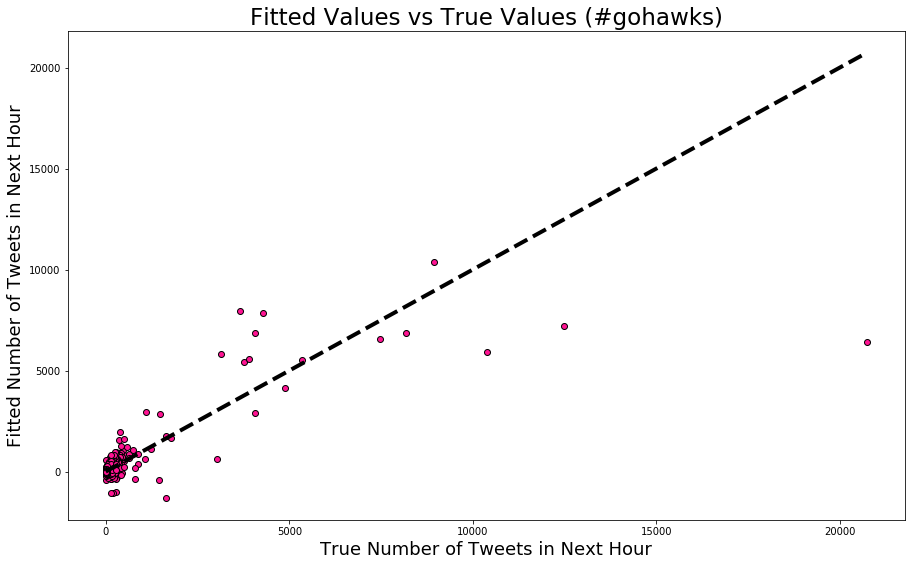

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     130.4
Date:                Mon, 12 Mar 2018   Prob (F-statistic):          2.36e-123
Time:                        15:48:56   Log-Likelihood:                -4680.8
No. Observations:                 578   AIC:                             9380.
Df Residuals:                     569   BIC:                             9419.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.0099     39.476     -0.254      0.8

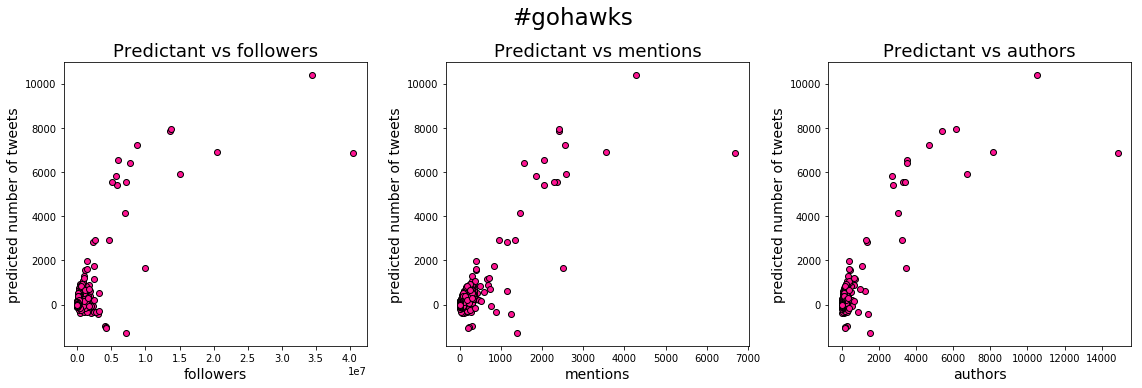

time  tweet  retweets  followers  urls  authors  mentions  \
date     time                                                              
20150114 1        1      1         4    10955.0     0        1         2   
         2        2      1         3     1762.0     0        1         0   
         3        3      0         0        0.0     0        0         0   
         4        4      2         3     1168.0     0        2         3   
         5        5      2         3      465.0     1        2         1   
         6        6      2         3     2850.0     0        1         2   
         7        7      1         1     1101.0     0        1         1   
         8        8      1         1      712.0     0        1         0   
         9        9      1         6     2895.0     1        1         0   
         10      10      5         5     4732.0     1        5         5   
         11      11      3         3     1547.0     0        3         2   
         12      12      3         5     1868.0     0        3         3   
         13      13      0         0        0.0     0        0         0   
         14      14      1         4      158.0     0        1         1   
         15      15      1         2       81.0     0        1         1   
         16      16      1         1     1000.0     0        1         2   
         17      17      2         9     1000.0     1        1         0   
         18      18      3         4     1147.0     1        3         1   
         19      19      0         0        0.0     0        0         0   
         20      20      4        38     5439.0     0        4         1   
         21      21      0         0        0.0     0        0         0   
         22      22      0         0        0.0     0        0         0   
         23      23      0         0        0.0     0        0         0   
20150115 0        0      1         4     1357.0     0        1         3   
         1        1      1         1      466.0     0        1         0   
         2        2      1         1     1762.0     0        1         0   
         3        3      1         1       29.0     1        1         0   
         4        4      1         1      387.0     1        1         0   
         5        5      3         3     4063.0     0        3         6   
         6        6      1         1      265.0     0        1         2   
...             ...    ...       ...        ...   ...      ...       ...   
20150205 18      18      0         0        0.0     0        0         0   
         19      19      0         0        0.0     0        0         0   
         20      20      0         0        0.0     0        0         0   
         21      21      0         0        0.0     0        0         0   
         22      22      0         0        0.0     0        0         0   
         23      23      0         0        0.0     0        0         0   
20150206 0        0      0         0        0.0     0        0         0   
         1        1      0         0        0.0     0        0         0   
         2        2      0         0        0.0     0        0         0   
         3        3      0         0        0.0     0        0         0   
         4        4      0         0        0.0     0        0         0   
         5        5      1         1      854.0     0        1         0   
         6        6      0         0        0.0     0        0         0   
         7        7      0         0        0.0     0        0         0   
         8        8      0         0        0.0     0        0         0   
         9        9      0         0        0.0     0        0         0   
         10      10      0         0        0.0     0        0         0   
         11      11      0         0        0.0     0        0         0   
         12      12      0         0        0.0     0        0         0   
         13      13      0         0        0.0     0        0 

============================================ #gopatriots ==============================================
RMSE of the linear regression model is: 104.383176374


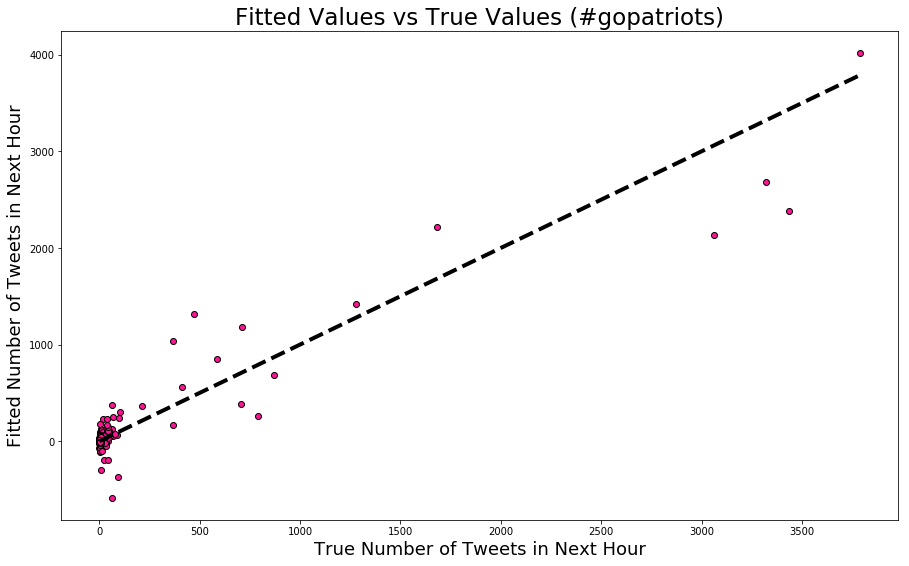

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     532.2
Date:                Mon, 12 Mar 2018   Prob (F-statistic):          2.26e-257
Time:                        15:48:58   Log-Likelihood:                -3482.5
No. Observations:                 574   AIC:                             6983.
Df Residuals:                     565   BIC:                             7022.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.1230      4.658     -1.529      0.1

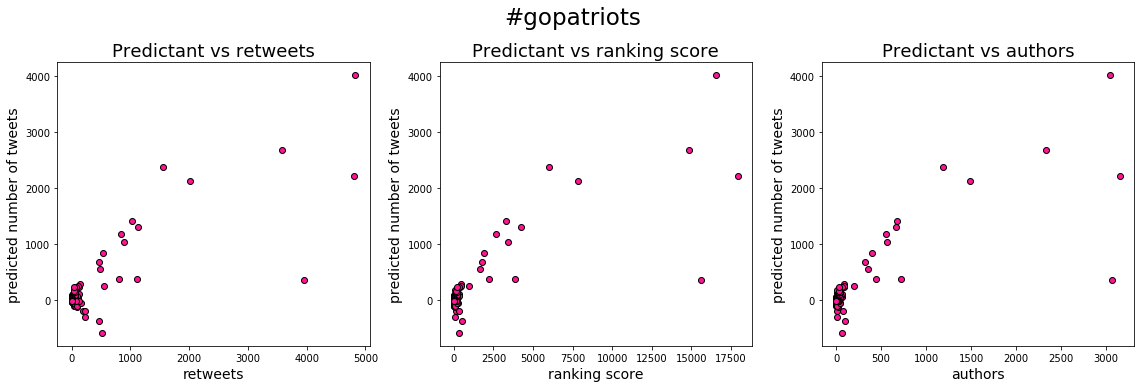

time  tweet  retweets  followers  urls  authors  mentions  \
date     time                                                              
20150114 0        0     59        67   104976.0    61       32         1   
         1        1     54       193   107645.0    49       36         4   
         2        2     56        96   100947.0    51       31        11   
         3        3     67       133   103114.0    66       44         8   
         4        4     64       194   130233.0    60       47         8   
         5        5     79        97   185904.0    74       54         8   
         6        6     86       124   263877.0    77       65        25   
         7        7    148       241   502694.0   169      116        27   
         8        8    178       346   625793.0   160      127        41   
         9        9    159       747   331514.0   133      104        43   
         10      10    221       306  2267073.0   201      143        53   
         11      11    237       436   612992.0   206      181        85   
         12      12    242       306  1225986.0   222      165        63   
         13      13    237       286   801124.0   195      168        81   
         14      14    234      1256   803184.0   212      177        71   
         15      15    338       645  1307815.0   310      256        39   
         16      16     98       114   193637.0    85       78        29   
         17      17     97       118   289551.0    86       73        26   
         18      18    100       131   146361.0    96       71        18   
         19      19    120       290  1073839.0   116       88        33   
         20      20    145       169   275212.0   134       93        20   
         21      21    108       123   192879.0    98       56        16   
         22      22     79        86   178712.0    77       55        10   
         23      23     55        64   126161.0    51       42         3   
20150115 0        0     56        76   899820.0    56       36         7   
         1        1    226       345  3428044.0   225      180         8   
         2        2    113       233   185803.0   108       69         4   
         3        3    119       132   196742.0   117       87        10   
         4        4    256       315   488219.0   255      223        13   
         5        5     74       205   312344.0    63       62        21   
...             ...    ...       ...        ...   ...      ...       ...   
20150206 5        5    292       360  1176394.0   362      160        31   
         6        6    625       712  2260247.0   663      277        61   
         7        7    653       919  2459016.0   711      319       124   
         8        8    787       979  3008167.0   748      429       193   
         9        9    773      1051  3207082.0   708      382       163   
         10      10    920      1108  1998145.0   988      409       149   
         11      11   1094      1557  4101108.0  1311      435       150   
         12      12   1136      1650  3757672.0  1167      541       201   
         13      13    792      1034  4548202.0   712      398       167   
         14      14    902      1253  4756560.0   926      468       159   
         15      15    690       944  4164628.0   627      369       125   
         16      16    661       766  2085644.0   646      353       118   
         17      17    658       867  2962317.0   641      318        83   
         18      18    690      1142  1538272.0   614      360       118   
         19      19    600       708  2006570.0   596      276        68   
         20      20    609       696  1028073.0   567      240        50   
         21      21    643       680  1075746.0   644      257        35   
         22      22    382       425   810697.0   356      187        42   
         23      23    278       299   656931.0   250      126        16   
20150207 0        0      2         5      144.0     1        2 

============================================ #nfl ==============================================
RMSE of the linear regression model is: 453.084472664


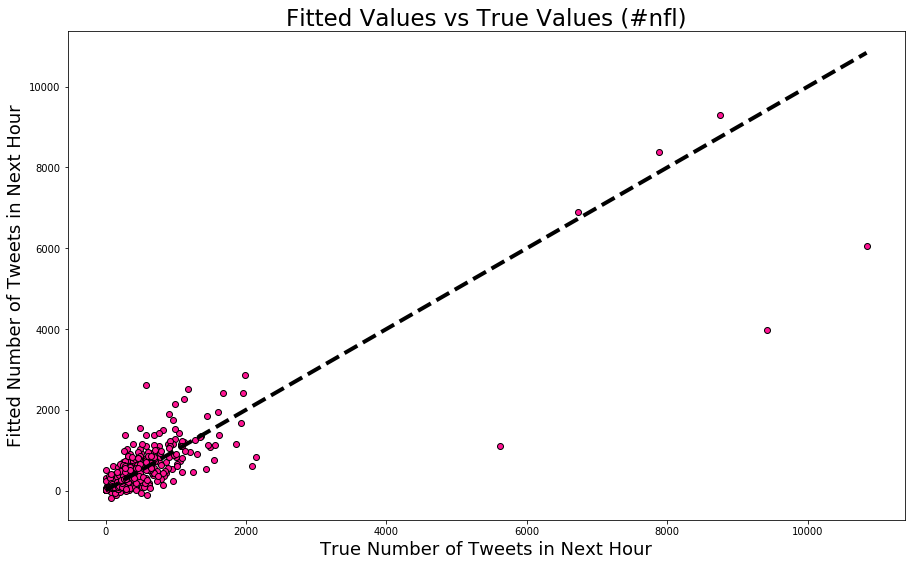

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     200.5
Date:                Mon, 12 Mar 2018   Prob (F-statistic):          4.10e-161
Time:                        15:49:00   Log-Likelihood:                -4415.5
No. Observations:                 586   AIC:                             8849.
Df Residuals:                     577   BIC:                             8888.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.6813     30.879      0.605      0.5

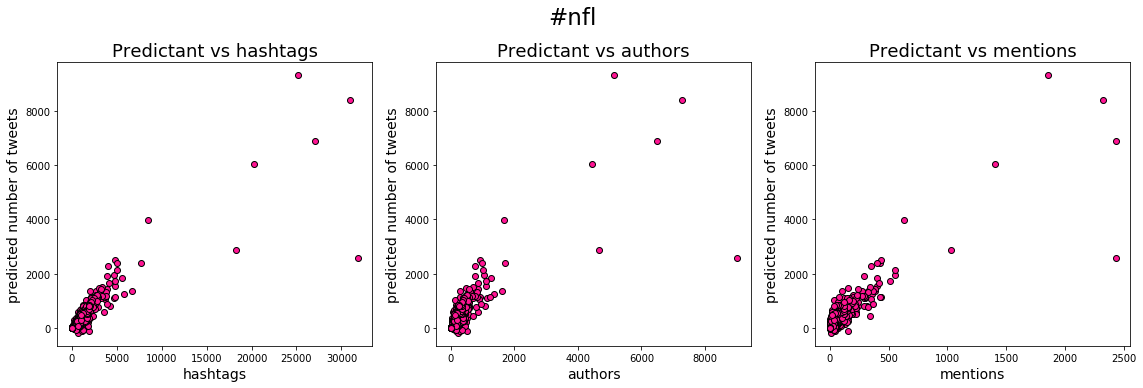

time  tweet  retweets  followers  urls  authors  mentions  \
date     time                                                              
20150114 0        0     23       223   114149.0    17       20        14   
         1        1     20       565    73013.0    15       15         3   
         2        2     32        94   122649.0    28       23         7   
         3        3     23       107    84212.0    19       19         3   
         4        4     47       207   279658.0    33       38        38   
         5        5     61       192   333266.0    38       52        28   
         6        6     77       344   517566.0    57       61        29   
         7        7    121       585   596377.0    70       86        57   
         8        8    248      1099  2737698.0   102      165        86   
         9        9    207       423  1198061.0    92      159        77   
         10      10    157       395  1267119.0   102      118        67   
         11      11    184       403   921826.0   101      133        53   
         12      12    156       346  1506843.0   115      114        56   
         13      13    197       502  3154054.0   119      139        70   
         14      14    141      2513   727752.0    89       99        71   
         15      15    130       667   529271.0    64      101        68   
         16      16     75       228   551232.0    43       57        53   
         17      17     76       177  1683010.0    38       59        25   
         18      18     64       156   786547.0    52       50        27   
         19      19     65       145   303193.0    40       51        27   
         20      20     86       286   638861.0    61       58        27   
         21      21     81       101   227787.0    68       38        12   
         22      22     44        66   157230.0    34       34        17   
         23      23     22        30    78635.0    17       18         6   
20150115 0        0     20        25    45357.0    11       17         8   
         1        1     41        41    80464.0    37       20         6   
         2        2     45        56    75563.0    37       26         5   
         3        3     40        46   198537.0    32       32        13   
         4        4     64       129   237644.0    37       53        25   
         5        5     51        73   503045.0    26       47        26   
...             ...    ...       ...        ...   ...      ...       ...   
20150206 5        5     18        24    94417.0    12       16         4   
         6        6     71        97   908560.0    59       40        15   
         7        7     60        77   490917.0    46       50        11   
         8        8     87       124  1056811.0    72       50        42   
         9        9     78       122   162302.0    69       43        22   
         10      10     78       102   150376.0    64       47        19   
         11      11     59       104   187780.0    45       51        23   
         12      12     54        61   147466.0    51       40         9   
         13      13     69       102   201102.0    52       52        30   
         14      14     68       184   104611.0    53       53        22   
         15      15     59       115   206629.0    56       38        25   
         16      16     50        61   147961.0    43       43        23   
         17      17     49        71   176832.0    38       36        10   
         18      18    130       152   123737.0   122       89        13   
         19      19     70        98   173089.0    59       50        16   
         20      20     74        81    63239.0    69       34        11   
         21      21     84        88    48166.0    78       38         0   
         22      22     30        33    32710.0    25       25         3   
         23      23     23        30    36467.0    17       17         2   
20150207 0        0      4         7     2985.0     1        4 

============================================ #patriots ==============================================
RMSE of the linear regression model is: 1924.58516019


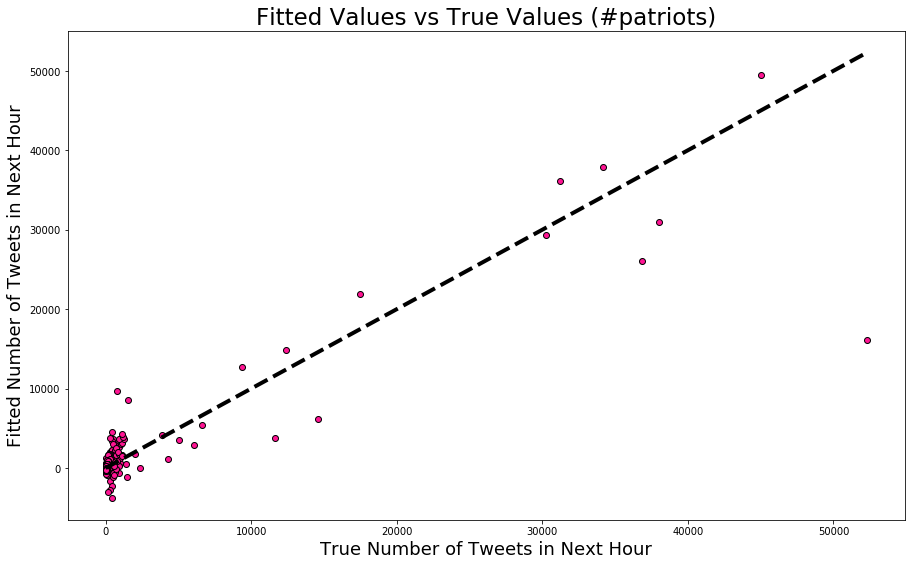

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     304.1
Date:                Mon, 12 Mar 2018   Prob (F-statistic):          2.41e-201
Time:                        15:49:02   Log-Likelihood:                -5263.1
No. Observations:                 586   AIC:                         1.054e+04
Df Residuals:                     577   BIC:                         1.058e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -288.8739    105.919     -2.727      0.0

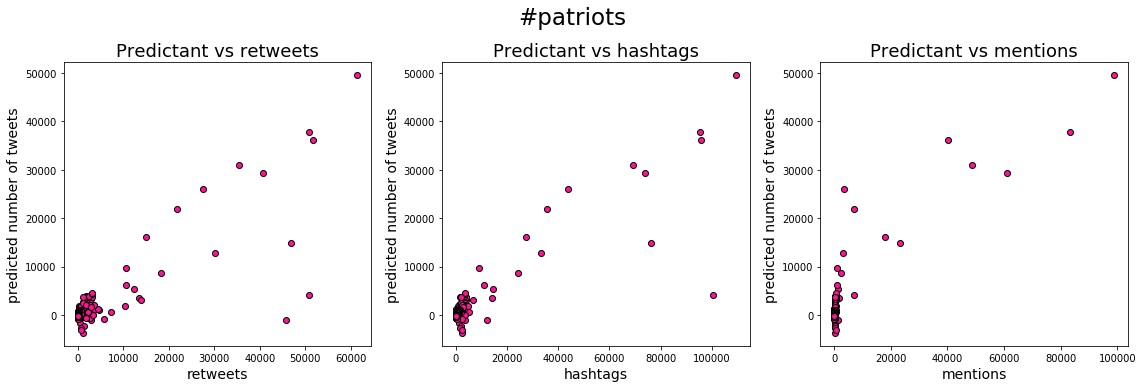

time  tweet  retweets   followers  urls  authors  mentions  \
date     time                                                               
20150114 4        4      1         2        59.0     0        1         0   
         5        5      0         0         0.0     0        0         0   
         6        6      2         2        74.0     1        2         3   
         7        7      3         5      1354.0     3        3         5   
         8        8      3         3       568.0     1        3         3   
         9        9      1         2       407.0     0        1         0   
         10      10      0         0         0.0     0        0         0   
         11      11      3        27   1616364.0     1        3         4   
         12      12      0         0         0.0     0        0         0   
         13      13      8        11      1428.0     0        3         4   
         14      14    107       113      5129.0     2        4         4   
         15      15    115       116       354.0     1        2         2   
         16      16      1         1        74.0     0        1         0   
         17      17      1         1      1175.0     1        1         3   
         18      18      1         1         1.0     0        1         0   
         19      19     28        28        56.0     0        1         0   
         20      20     42        42       553.0     1        2         2   
         21      21     59        59       118.0     0        1         0   
         22      22     59        60       118.0     0        1         0   
         23      23      0         0         0.0     0        0         0   
20150115 0        0      0         0         0.0     0        0         0   
         1        1      1         1       683.0     1        1         0   
         2        2      1         1       596.0     1        1         2   
         3        3      0         0         0.0     0        0         0   
         4        4      1         1       919.0     1        1         0   
         5        5      1         1         7.0     0        1         1   
         6        6      1         1       144.0     0        1         0   
         7        7      1         1       407.0     0        1         0   
         8        8      0         0         0.0     0        0         0   
         9        9      2         2       268.0     1        2         2   
...             ...    ...       ...         ...   ...      ...       ...   
20150206 5        5     22        29     11846.0    13       21        24   
         6        6     67       121    624995.0    43       62        48   
         7        7    153       358    452447.0   123      145       288   
         8        8    108       134    504784.0    77      102       148   
         9        9     83       328   1960083.0    55       67        90   
         10      10     69       109    221323.0    39       63        41   
         11      11     79       410   4552285.0    61       72        88   
         12      12     85       556   6495449.0    56       81        76   
         13      13     97      4333   5890181.0    68       80        75   
         14      14    130      1005  10447068.0    92      125       135   
         15      15     77       347   5760808.0    50       70        71   
         16      16     70       122    350354.0    44       66        69   
         17      17     59       146   1452622.0    33       58        61   
         18      18     60       180   2871437.0    36       54        56   
         19      19     59       129    606028.0    44       50        48   
         20      20     40       411   9740299.0    15       38        37   
         21      21     31        34    115741.0    25       29        31   
         22      22     26        30     12130.0    15       18        24   
         23      23     21        26    157772.0    16       20         8   
20150207 0 

============================================ #sb49 ==============================================
RMSE of the linear regression model is: 3927.34781823


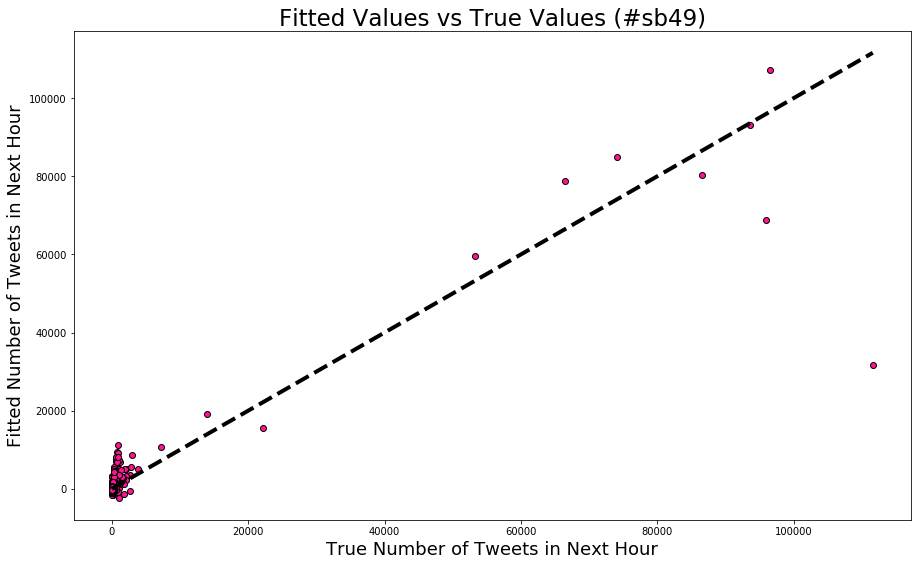

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     404.0
Date:                Mon, 12 Mar 2018   Prob (F-statistic):          6.81e-230
Time:                        15:49:10   Log-Likelihood:                -5642.3
No. Observations:                 582   AIC:                         1.130e+04
Df Residuals:                     573   BIC:                         1.134e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -485.2193    178.873     -2.713      0.0

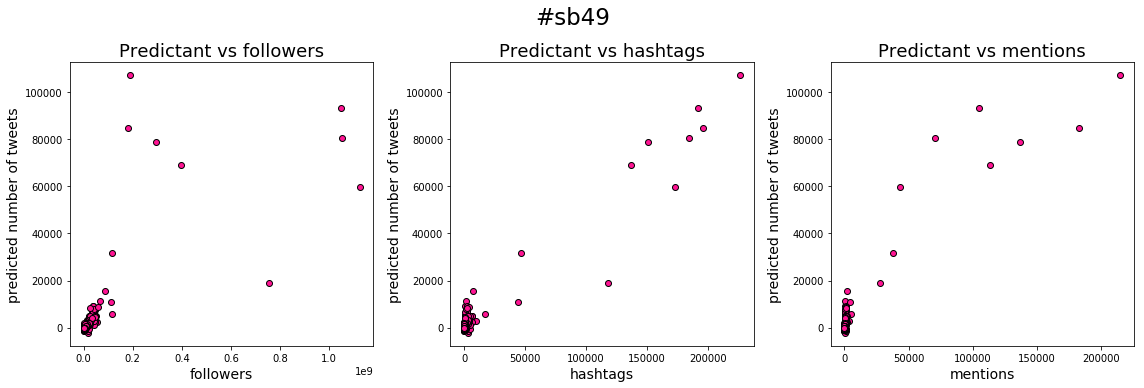

time  tweet  retweets   followers  urls  authors  mentions  \
date     time                                                               
20150114 0        0      8         9      3181.0     6        7        10   
         1        1      7        10     13031.0     3        6         7   
         2        2     12        75   1406539.0     5       12         7   
         3        3     12        14     26140.0    10       11         6   
         4        4     14        19     29638.0     6       14        10   
         5        5     11        21     39735.0     8       11         9   
         6        6     21        38     39514.0    11       21        11   
         7        7     32        59    226562.0    13       31        23   
         8        8     61       119    822461.0    34       55        37   
         9        9     58        95    177967.0    36       43        36   
         10      10     70        96    582835.0    44       54        43   
         11      11     57        85    266742.0    36       50        36   
         12      12     56        84    178891.0    27       53        43   
         13      13     63        88    250050.0    27       55        54   
         14      14     56       115    260018.0    29       52        38   
         15      15     34        50     77429.0    20       32        29   
         16      16     25        46     84394.0    12       24        15   
         17      17     24        37    556673.0    13       23        18   
         18      18     19        47    657680.0    11       17         5   
         19      19     35        45     49625.0     9       31        30   
         20      20     32        50    645764.0    14       32        23   
         21      21     21        28     40053.0     7       21        21   
         22      22     16        22     10036.0     7       16        14   
         23      23     14        16     10989.0    11       13         8   
20150115 0        0     11        13      8339.0     6       10         6   
         1        1     16        23    229951.0    12       16        10   
         2        2      9        16      5174.0     4        9         5   
         3        3     15        33     35330.0    10       15        15   
         4        4     24        39    300422.0    12       24        13   
         5        5     16        23     45848.0     5       16        18   
...             ...    ...       ...         ...   ...      ...       ...   
20150206 5        5     86       137   4215590.0    54       85        51   
         6        6    268       397   1865963.0   218      195        96   
         7        7    342       425   1207573.0   260      280       216   
         8        8    360      1391  12274953.0   292      314       215   
         9        9    334       612   4942048.0   273      293       192   
         10      10    330       632   5153331.0   268      285       209   
         11      11    332       716  11868181.0   258      282       163   
         12      12    442       653   1894513.0   328      384       216   
         13      13    330       474   3809174.0   258      277       178   
         14      14    296       831   4857755.0   228      273       163   
         15      15    233       622   8361008.0   177      206       139   
         16      16    248       377   4172562.0   198      195       125   
         17      17    581       700   3047706.0   507      342       101   
         18      18    228       338   1233591.0   175      179        99   
         19      19    219       349    797312.0   179      163        88   
         20      20    224       450   7996629.0   177      172        97   
         21      21    211       247    447269.0   174      122        40   
         22      22    122       142    267194.0    98       90        42   
         23      23    135       175   1488263.0   106      111        30   
20150207 0 

============================================ #superbowl ==============================================
RMSE of the linear regression model is: 6164.33210583


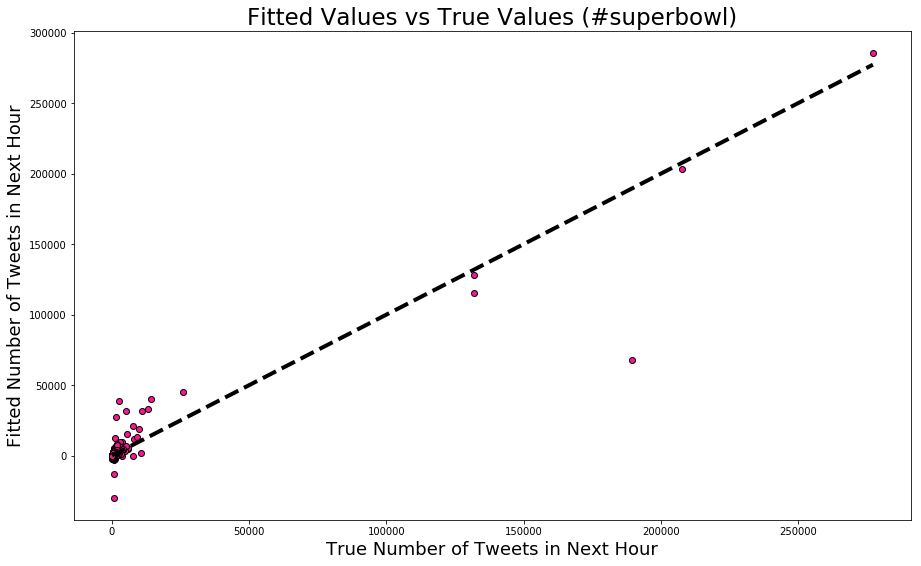

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     542.5
Date:                Mon, 12 Mar 2018   Prob (F-statistic):          9.75e-263
Time:                        15:49:14   Log-Likelihood:                -5945.2
No. Observations:                 586   AIC:                         1.191e+04
Df Residuals:                     577   BIC:                         1.195e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -652.4337    302.118     -2.160      0.0

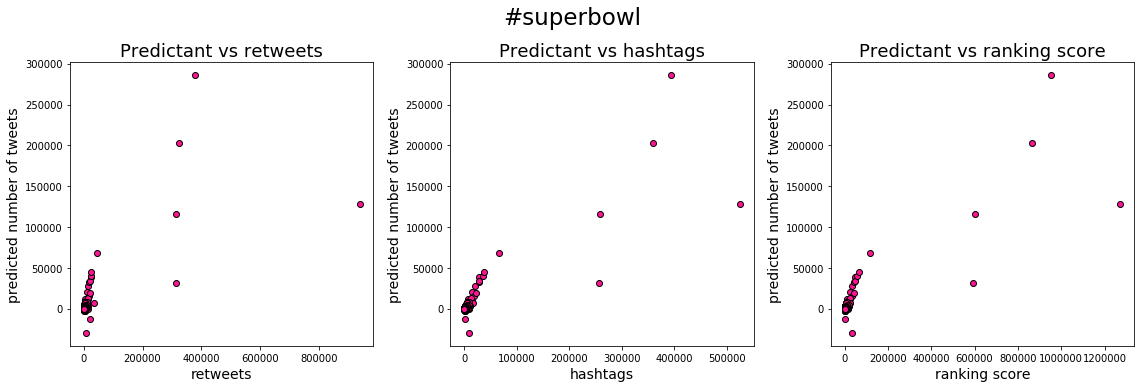

In [38]:
import statsmodels.api as sm
from statsmodels.regression.linear_model import RegressionResults


# --------------------- train linear regression model ----------------------- #
# define paths
files = ['extracted_data/Q1.3_#gohawks.csv', 'extracted_data/Q1.3_#gopatriots.csv', 'extracted_data/Q1.3_#nfl.csv', 'extracted_data/Q1.3_#patriots.csv', 'extracted_data/Q1.3_#sb49.csv', 'extracted_data/Q1.3_#superbowl.csv']

# calculate RMSE
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

# load and process data from each hashtag file
def load_and_process(file):
    # process and groupby data
    data = pd.read_csv(file)
    data.columns = ['tweet', 'date', 'time', 'followers', 'retweets', 'urls', 'authors', 'mentions', 'ranking score', 'hashtags']
    df = data.groupby(['date', 'time']).agg({'tweet' : np.sum, 'retweets' : np.sum, 'followers' : np.sum, 'urls' : np.sum, 'authors' : np.sum, 'mentions' : np.sum, 'ranking score' : np.sum, 'hashtags' : np.sum})
    
    # fill up non-exists hours with all zero data
    app_rows = []
    for i in range(1,len(df.index)):  
        pre_date = df.index[i-1][0]
        pre_hour = int(df.index[i-1][1])
        cur_date = df.index[i][0]
        cur_hour = int(df.index[i][1])
        if (cur_hour < pre_hour):
            cur_hour = cur_hour + 24
        hour_diff = cur_hour - pre_hour
        while (hour_diff > 1):
            pre_hour = pre_hour + 1
            if (pre_hour > 23):
                pre_date = cur_date
                app_rows.append({'tweet':0,'date':pre_date,'time':pre_hour-24,'followers':0,'retweets':0,'urls':0,'authors':0,'mentions':0,'ranking score':0,'hashtags':0})
            else:
                app_rows.append({'tweet':0,'date':pre_date,'time':pre_hour,'followers':0,'retweets':0,'urls':0,'authors':0,'mentions':0,'ranking score':0,'hashtags':0})
            hour_diff = cur_hour - pre_hour
    for row in app_rows:
        data = data.append(row, ignore_index=True)
    
    df = data.groupby(['date', 'time']).agg({'time' : np.max, 'tweet' : np.sum, 'retweets' : np.sum, 'followers' : np.sum, 'urls' : np.sum, 'authors' : np.sum, 'mentions' : np.sum, 'ranking score' : np.sum, 'hashtags' : np.sum})
    df.to_csv('extracted_data/Q1.3_hourly_'+file[20:-4]+'.csv', index=False)
    display(df)
    return df

# train and fit linear regression model
def regression_analysis(file, df):
    input_arr = []
    for index in df.index:
        input_arr.append(df.loc[index, 'tweet':'hashtags'].values)
    input_arr.pop()
    input_arr = sm.add_constant(input_arr)
    output_arr = df.loc[df.index[1]:, 'tweet'].values
    
    model = sm.OLS(output_arr, input_arr)
    results = model.fit()
    output_predicted = results.predict(input_arr)
    
    print ('============================================ '+file[20:-4]+' ==============================================')
    
#     # test
#     df2 = pd.DataFrame({
#         'true value':output_arr,
#         'predict value':output_predicted
#     })
#     display(df2)
#     # test
    
    # RMSE
    rmse_ = rmse(output_predicted, output_arr)
    print ('RMSE of the linear regression model is: '+str(rmse_))
    
    # plot fitted values vs true values
    plt.figure(figsize=(15,9))
    plt.scatter(output_arr, output_predicted, color='deeppink', edgecolors='k')
    plt.plot([output_arr.min(), output_arr.max()], [output_arr.min(), output_arr.max()], 'k--', lw=4)
    plt.ylabel('Fitted Number of Tweets in Next Hour', fontsize = 18)
    plt.xlabel('True Number of Tweets in Next Hour', fontsize = 18)
    plt.title('Fitted Values vs True Values ('+file[20:-4]+')', fontsize = 23)
    plt.show()
    
    # regression analysis
    print (results.summary())
    return output_predicted

# 'tweet','retweets','followers','urls','authors','mentions','ranking score','hashtags'
#   1         2           3        4        5          6           7             8
top3_features = {'#gohawks':['followers','mentions','authors'], 
                 '#gopatriots':['retweets','ranking score','authors'], 
                 '#nfl':['hashtags','authors','mentions'], 
                 '#patriots':['retweets','hashtags','mentions'], 
                 '#sb49':['followers','hashtags','mentions'], 
                 '#superbowl':['retweets','hashtags','ranking score']}
# plot top 3 features results
def plot_top3_features(file, df, output_predicted):
    features = top3_features[file]
    opt = []
    for i in range(3):
        cur_feature = []
        for index in df.index:
            cur_feature.append(df.loc[index, features[i]:features[i]].values)
        cur_feature.pop()
        opt.append(cur_feature)
    
    fig = plt.figure(figsize=(16,5))
    fig.suptitle(file, y=1.07, fontsize=23)
    for i in range(3):
        ax = plt.subplot(131+i)
        ax.set_title('Predictant vs '+features[i], fontsize=18)
        ax.scatter(opt[i], output_predicted, color='deeppink', edgecolors='k')
        ax.set_xlabel(features[i], fontsize=14)
        ax.set_ylabel('predicted number of tweets', fontsize=14)
    plt.tight_layout()
    plt.show()
    print ('==========================================================================================================')
    print ()

# linear regression model on specified hashtag
def regression_model(file):
    df = load_and_process(file)
    output_predicted = regression_analysis(file, df)
    plot_top3_features(file[20:-4], df, output_predicted)

# linear regression model on each hashtag
for file in files:
    regression_model(file)
